In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import time

In [2]:
# define num_class
num_classes = 10

# load dataset keras will download cifar-10 datset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()  

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

ytest1=y_test
# (Optional)Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
#Covert the input images to same scale
X_train = X_train/255
X_test = X_test/255

### Method 1: Deep Neural Network with Convolutional Layer

#### VGG 3 Based Architecture

In [4]:
start_time = time.time()

tf.keras.backend.clear_session()

#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add first  set of convolutional layer
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add second  set of convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))


#Add thirs set of  convolutional layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu',padding='same'))
#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))


#Flatten the output
model.add(tf.keras.layers.Flatten())

          
#Dense layer
model.add(tf.keras.layers.Dense(64, activation='relu'))
#Add another dropout layer
model.add(tf.keras.layers.Dropout(0.25))
#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
#Train the model
history = model.fit(X_train,y_train,
                    validation_data=(X_test,y_test),
                    epochs=10)
                    #batch_size=128)

Epoch 1/10
1563/1563 [==============================] - 216s 137ms/step - loss: 1.7694 - accuracy: 0.3531 - val_loss: 1.0401 - val_accuracy: 0.6265
Epoch 2/10
1563/1563 [==============================] - 216s 138ms/step - loss: 1.0552 - accuracy: 0.6295 - val_loss: 0.8486 - val_accuracy: 0.7020
Epoch 3/10
1563/1563 [==============================] - 222s 142ms/step - loss: 0.8394 - accuracy: 0.7082 - val_loss: 0.7985 - val_accuracy: 0.7283
Epoch 4/10
1563/1563 [==============================] - 223s 143ms/step - loss: 0.6959 - accuracy: 0.7601 - val_loss: 0.6867 - val_accuracy: 0.7686
Epoch 5/10
1563/1563 [==============================] - 329s 210ms/step - loss: 0.6115 - accuracy: 0.7923 - val_loss: 0.7160 - val_accuracy: 0.7692
Epoch 6/10
1563/1563 [==============================] - 120s 77ms/step - loss: 0.5312 - accuracy: 0.8160 - val_loss: 0.7448 - val_accuracy: 0.7579
Epoch 7/10
1563/1563 [==============================] - 124s 80ms/step - loss: 0.4788 - accuracy: 0.8346 - val_lo

In [8]:
end_time = time.time()
cnn_ct = end_time - start_time
print("Convergence Time in seconds:",(cnn_ct))

Convergence Time in seconds: 1865.7826697826385


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [10]:
#predictions:
y_pred = model.predict(X_test)
y_class = [np.argmax(element) for element in y_pred]
print("classification Report :\n",classification_report(ytest1,y_class))

classification Report :
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      1000
           1       0.88      0.90      0.89      1000
           2       0.74      0.64      0.69      1000
           3       0.56      0.66      0.60      1000
           4       0.73      0.77      0.75      1000
           5       0.67      0.74      0.70      1000
           6       0.81      0.84      0.82      1000
           7       0.87      0.75      0.81      1000
           8       0.89      0.84      0.86      1000
           9       0.86      0.86      0.86      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



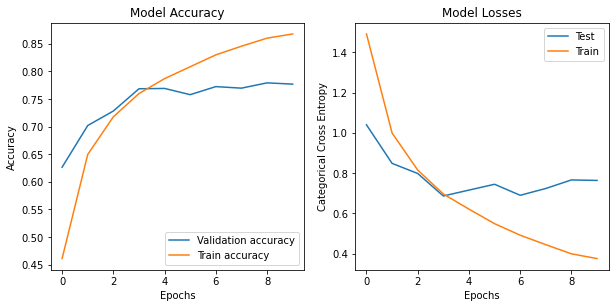

In [11]:
#plotting the accuracy
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Validation accuracy','Train accuracy'], loc = 'lower right')


#plotting the losses
plt.subplot(2,2,2)
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross Entropy')
plt.title('Model Losses')
plt.legend(['Test','Train'], loc = 'upper right')
plt.show()

In [13]:
tf.math.confusion_matrix(ytest1,y_class)
cnn_acc=accuracy_score(ytest1,y_class)
cnn_acc

0.777

### Method 2: Deep Neural Network with Convolution Layer

In [14]:

#Initialize Sequential model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.3))


#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))



In [15]:
#Compile the model
sgd_op = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=sgd_op, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [16]:
#Train the model
history = model.fit(X_train,y_train,
                    validation_data=(X_test,y_test),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8990 - accuracy: 0.3272 - val_loss: 1.5568 - val_accuracy: 0.4535
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6085 - accuracy: 0.4268 - val_loss: 1.4882 - val_accuracy: 0.4727
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5410 - accuracy: 0.4558 - val_loss: 1.4382 - val_accuracy: 0.4876
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4874 - accuracy: 0.4701 - val_loss: 1.4128 - val_accuracy: 0.4932
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4401 - accuracy: 0.4882 - val_loss: 1.3680 - val_accuracy: 0.5166
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4051 - accuracy: 0.5002 - val_loss: 1.3785 - val_accuracy: 0.5080
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3856 - accuracy: 0.5046 - val_loss: 1.3652 - val_accuracy

In [17]:
end_time = time.time()
dnn_ct = end_time - start_time
print("Convergence Time in seconds:",(dnn_ct))

Convergence Time in seconds: 1980.5928654670715


In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               614600    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 200)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 200)               800       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)              

In [20]:
#predictions:
y_pred = model.predict(X_test)
y_class = [np.argmax(element) for element in y_pred]
print("classification Report :\n",classification_report(ytest1,y_class))

classification Report :
               precision    recall  f1-score   support

           0       0.59      0.58      0.59      1000
           1       0.65      0.61      0.63      1000
           2       0.41      0.40      0.41      1000
           3       0.37      0.34      0.35      1000
           4       0.42      0.50      0.46      1000
           5       0.44      0.38      0.41      1000
           6       0.56      0.61      0.58      1000
           7       0.61      0.58      0.60      1000
           8       0.64      0.65      0.65      1000
           9       0.57      0.61      0.59      1000

    accuracy                           0.53     10000
   macro avg       0.53      0.53      0.53     10000
weighted avg       0.53      0.53      0.53     10000



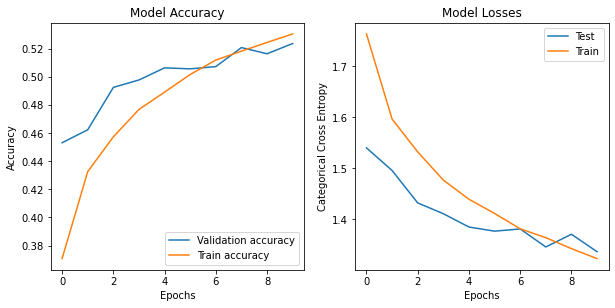

In [15]:
#plotting the accuracy
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Validation accuracy','Train accuracy'], loc = 'lower right')


#plotting the losses
plt.subplot(2,2,2)
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross Entropy')
plt.title('Model Losses')
plt.legend(['Test','Train'], loc = 'upper right')
plt.show()

### Method 3: Logistic Regression

In [16]:
# load dataset keras will download cifar-10 datset
(X_train1, y_train1), (X_test1, y_test1) = cifar10.load_data()  

print('X_train shape:', X_train.shape)
print(X_train1.shape[0], 'train samples')
print(X_test1.shape[0], 'test samples')

#Reshape the input image from 4D to 2D
X_train1 = np.reshape(X_train, (X_train.shape[0], -1))
X_test1 = np.reshape(X_test, (X_test.shape[0], -1))

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [17]:
start_time=time.time()
#fitting data to logistic regression model
logreg = LogisticRegression(multi_class='ovr')
model1 = logreg.fit(X_train1,y_train1)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) 

Convergence Time in seconds: 134.61242723464966


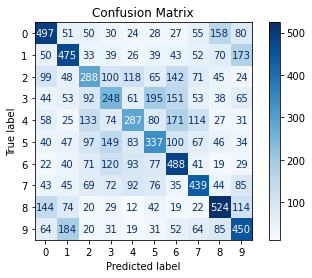

Logistic Regression Classification Report:

               precision    recall  f1-score   support

           0       0.47      0.50      0.48      1000
           1       0.46      0.47      0.47      1000
           2       0.33      0.29      0.31      1000
           3       0.28      0.25      0.26      1000
           4       0.35      0.29      0.32      1000
           5       0.35      0.34      0.34      1000
           6       0.40      0.49      0.44      1000
           7       0.45      0.44      0.44      1000
           8       0.50      0.52      0.51      1000
           9       0.41      0.45      0.43      1000

    accuracy                           0.40     10000
   macro avg       0.40      0.40      0.40     10000
weighted avg       0.40      0.40      0.40     10000



In [18]:
end_time = time.time()
print("Convergence Time in seconds:",(end_time - start_time))
#finding tghe predictions
y_predlog = model1.predict(X_test1)


# Plotting confusion matrix
cm = plot_confusion_matrix(model1,X_test1,y_test1, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# Getting the classification report
print("Logistic Regression Classification Report:\n\n",classification_report(y_test1, y_predlog))

### Method 4: SVM with RBF Kernal

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

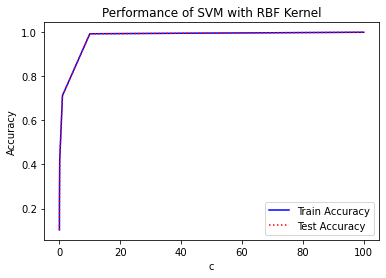

Convergence Time in seconds: 3860.929183244705


In [19]:
start_time = time.time()
train_acc1=[]
test_acc1=[]

def svm_rbf(c):
    SVM_RBF = SVC(probability = False, kernel = 'rbf', C = c)
    
    SVM_RBF.fit(X_train1[:10000,:], y_train1[:10000]) 
    
    # Find the prediction and accuracy on the training set
    train_pred= SVM_RBF.predict(X_train1[:10000,:])
    train_acc = accuracy_score(y_train1[:10000],train_pred)
    train_acc1.append(train_acc)
   
    # Find the prediction and accuracy on the test set
    test_pred= SVM_RBF.predict(X_test1[:10000,:])
    test_acc = accuracy_score(y_train1[:10000],train_pred)
    test_acc1.append(test_acc)
    
c = [0.001,0.01,0.1,1,10,100]

for c_value in c:
    svm_rbf(c_value)
    
plt.plot(c, train_acc1,color='blue')
plt.plot(c, test_acc1,color='red',linestyle=':')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title("Performance of SVM with RBF Kernel")
plt.show()

end_time = time.time()
print("Convergence Time in seconds:",(end_time - start_time))